In [3]:
import pandas as pd

from pa_tools.generators import PriceBasedPositionGenerator
from pa_tools.generators import HighLowBasedPositionGenerator

from pa_tools.models import PositionLimitModel
from pa_tools.models import PositionRankIndexModel

In [4]:
raw_ohlcv = pd.read_csv("./data/ohlcv.csv", index_col=0, low_memory=False)
raw_ohlcv.head()

,open,high,low,close,volume,change,stock_code
date,,,,,,,
2019-01-21,9660,9820,9650,9750,65445,0.011411,000020
2019-01-22,9750,9860,9660,9800,42143,0.005128,000020
2019-01-23,9840,9880,9740,9820,31492,0.002041,000020
2019-01-24,9820,10000,9710,10000,109714,0.018330,000020
2019-01-25,10000,10100,9920,9980,24176,-0.002000,000020


In [34]:
multi_ohlcv = raw_ohlcv.copy()

_stock_code = raw_ohlcv["stock_code"].sample(1).iloc[0]

single_ohlcv = raw_ohlcv[raw_ohlcv["stock_code"] == _stock_code].copy()
single_ohlcv.index = pd.to_datetime(single_ohlcv.index)
single_ohlcv.head()

,open,high,low,close,volume,change,stock_code
date,,,,,,,
2019-01-21,10900,11300,10700,11150,29684,0.022936,004440
2019-01-22,11200,11600,11050,11600,35450,0.040359,004440
2019-01-23,11550,11850,11500,11650,30190,0.004310,004440
2019-01-24,11800,11850,11300,11750,43749,0.008584,004440
2019-01-25,11500,11650,11000,11500,28598,-0.021277,004440


In [35]:
pb_generator = PriceBasedPositionGenerator()

# 가격 기반
pb_rp = pb_generator.get_raw_position(prices=single_ohlcv["close"], time_size=60, position_size=100)
pb_rp_df = pb_generator.get_raw_position_df(
    prices=single_ohlcv["close"], time_size=60, position_size=100
)

In [36]:
# 가격/거래량 기반
pb_rvp = pb_generator.get_raw_volume_position(
    prices=single_ohlcv["close"], volumes=single_ohlcv["volume"], time_size=60, position_size=100
)
pb_rvp_df = pb_generator.get_raw_volume_position_df(
    prices=single_ohlcv["close"], volumes=single_ohlcv["volume"], time_size=60, position_size=100
)

In [37]:
# 시간가중 가격 기반
pb_tdp = pb_generator.get_time_dependent_position(
    prices=single_ohlcv["close"], time_size=60, position_size=100
)
pb_tdp_df = pb_generator.get_time_dependent_position_df(
    prices=single_ohlcv["close"], time_size=60, position_size=100
)

In [38]:
# 시간가중 가격 / 거래량 기반
pb_tdvp = pb_generator.get_time_dependent_volume_position(
    prices=single_ohlcv["close"], volumes=single_ohlcv["volume"], time_size=60, position_size=100
)
pb_tdvp_df = pb_generator.get_time_dependent_volume_position_df(
    prices=single_ohlcv["close"], volumes=single_ohlcv["volume"], time_size=60, position_size=100
)

In [39]:
df = single_ohlcv.tail(60)

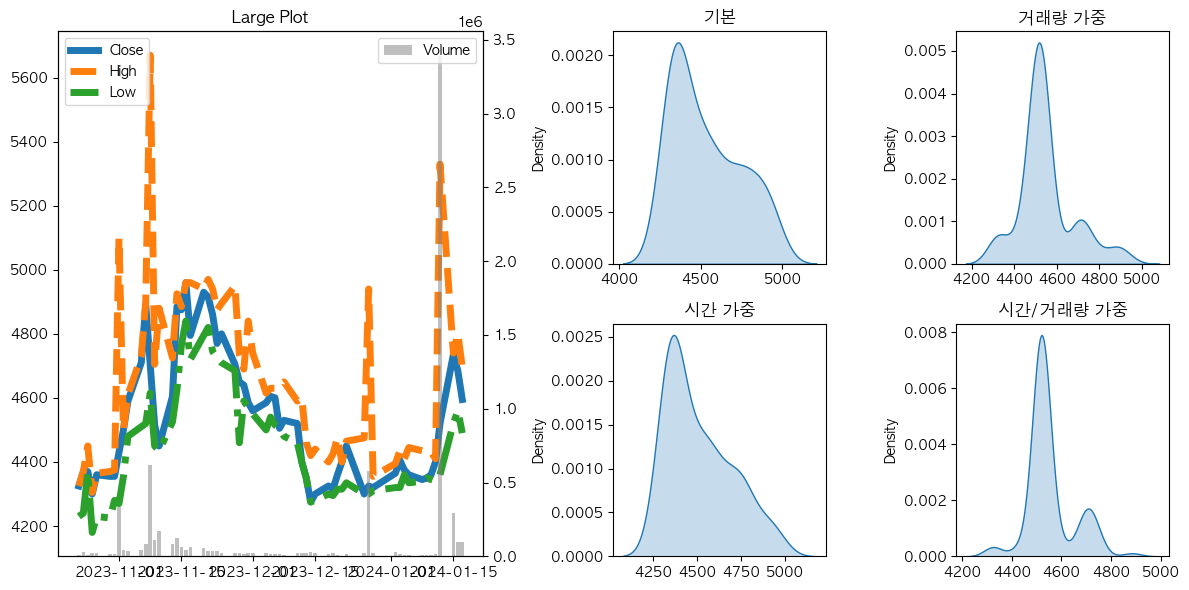

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "AppleGothic"

# 그림 및 그리드 설정
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1, 1], height_ratios=[1, 1])

# 왼쪽 큰 그림
ax1 = plt.subplot(gs[:, 0])
ax1.plot(df.index, df["close"], label="Close", linewidth=5)
ax1.plot(df.index, df["high"], label="High", linestyle="--", linewidth=5)
ax1.plot(df.index, df["low"], label="Low", linestyle="-.", linewidth=5)
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.bar(df.index, df["volume"], label="Volume", alpha=0.5, color="grey")
ax2.legend(loc="upper right")

ax1.set_title("Large Plot")

# 오른쪽 상단 첫 번째 작은 그림
ax2 = plt.subplot(gs[0, 1])
# ax2.plot([0, 1], [1, 0])
sns.kdeplot(pb_rp, fill=True, ax=ax2)
ax2.set_title("기본")

# 오른쪽 상단 두 번째 작은 그림
ax3 = plt.subplot(gs[0, 2])
sns.kdeplot(pb_rvp, fill=True, ax=ax3)
# ax3.plot([0, 1], [1, 0])
ax3.set_title("거래량 가중")

# 오른쪽 하단 첫 번째 작은 그림
ax4 = plt.subplot(gs[1, 1])
sns.kdeplot(pb_tdp, fill=True, ax=ax4)
# ax4.plot([1, 0], [0, 1])
ax4.set_title("시간 가중")

# 오른쪽 하단 두 번째 작은 그림
ax5 = plt.subplot(gs[1, 2])
sns.kdeplot(pb_tdvp, fill=True, ax=ax5)
# ax5.plot([1, 0], [0, 1])
ax5.set_title("시간/거래량 가중")

# 추가로 더 작은 그림을 그리고 싶다면, gs의 행과 열을 조정하고 subplot을 추가하면 됩니다.

plt.tight_layout()
plt.show()

In [41]:
hlb_generator = HighLowBasedPositionGenerator()

# 가격 기반
hlb_rp = hlb_generator.get_raw_position(
    highs=single_ohlcv["high"], lows=single_ohlcv["low"], time_size=60, position_size=100
)
hlb_rp_df = hlb_generator.get_raw_position_df(
    highs=single_ohlcv["high"], lows=single_ohlcv["low"], time_size=60, position_size=100
)

# 가격/거래량 기반
hlb_rvp = hlb_generator.get_raw_volume_position(
    highs=single_ohlcv["high"],
    lows=single_ohlcv["low"],
    volumes=single_ohlcv["volume"],
    time_size=60,
    position_size=100,
)
hlb_rvp_df = hlb_generator.get_raw_volume_position_df(
    highs=single_ohlcv["high"],
    lows=single_ohlcv["low"],
    volumes=single_ohlcv["volume"],
    time_size=60,
    position_size=100,
)

# 시간가중 가격 기반
hlb_tdp = hlb_generator.get_time_dependent_position(
    highs=single_ohlcv["high"], lows=single_ohlcv["low"], time_size=60, position_size=100
)
hlb_tdp_df = hlb_generator.get_time_dependent_position_df(
    highs=single_ohlcv["high"], lows=single_ohlcv["low"], time_size=60, position_size=100
)

# 시간가중 가격 / 거래량 기반
hlb_tdvp = hlb_generator.get_time_dependent_volume_position(
    highs=single_ohlcv["high"],
    lows=single_ohlcv["low"],
    volumes=single_ohlcv["volume"],
    time_size=60,
    position_size=100,
)
hlb_tdvp_df = hlb_generator.get_time_dependent_volume_position_df(
    highs=single_ohlcv["high"],
    lows=single_ohlcv["low"],
    volumes=single_ohlcv["volume"],
    time_size=60,
    position_size=100,
)

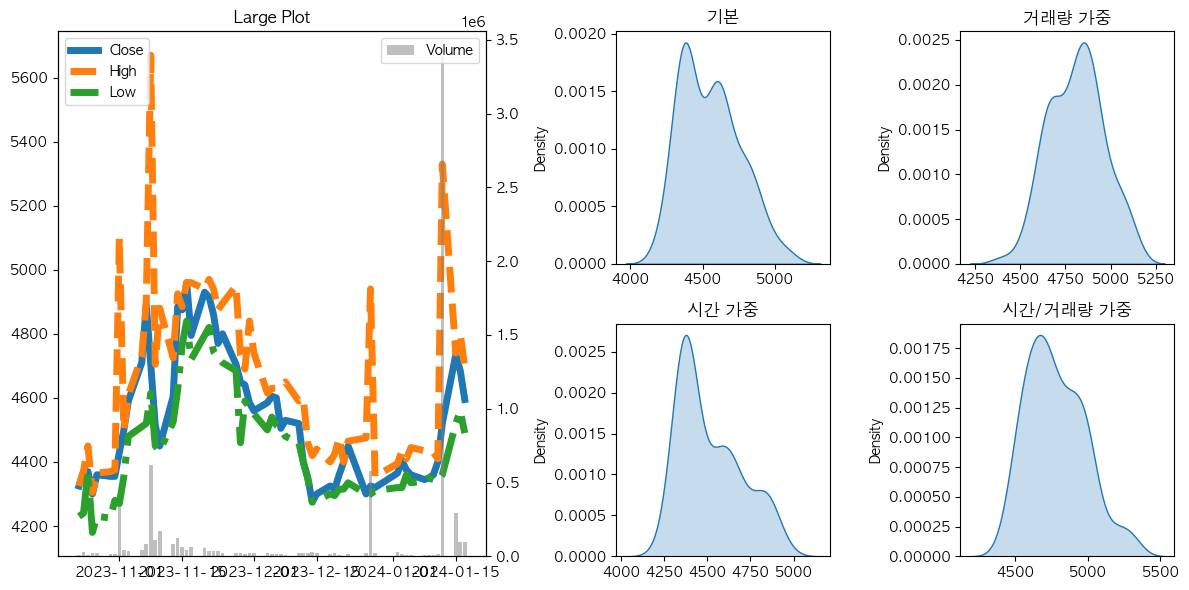

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "AppleGothic"

# 그림 및 그리드 설정
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1, 1], height_ratios=[1, 1])

# 왼쪽 큰 그림
ax1 = plt.subplot(gs[:, 0])
ax1.plot(df.index, df["close"], label="Close", linewidth=5)
ax1.plot(df.index, df["high"], label="High", linestyle="--", linewidth=5)
ax1.plot(df.index, df["low"], label="Low", linestyle="-.", linewidth=5)
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.bar(df.index, df["volume"], label="Volume", alpha=0.5, color="grey")
ax2.legend(loc="upper right")

ax1.set_title("Large Plot")

# 오른쪽 상단 첫 번째 작은 그림
ax2 = plt.subplot(gs[0, 1])
# ax2.plot([0, 1], [1, 0])
sns.kdeplot(hlb_rp, fill=True, ax=ax2)
ax2.set_title("기본")

# 오른쪽 상단 두 번째 작은 그림
ax3 = plt.subplot(gs[0, 2])
sns.kdeplot(hlb_rvp, fill=True, ax=ax3)
# ax3.plot([0, 1], [1, 0])
ax3.set_title("거래량 가중")

# 오른쪽 하단 첫 번째 작은 그림
ax4 = plt.subplot(gs[1, 1])
sns.kdeplot(hlb_tdp, fill=True, ax=ax4)
# ax4.plot([1, 0], [0, 1])
ax4.set_title("시간 가중")

# 오른쪽 하단 두 번째 작은 그림
ax5 = plt.subplot(gs[1, 2])
sns.kdeplot(hlb_tdvp, fill=True, ax=ax5)
# ax5.plot([1, 0], [0, 1])
ax5.set_title("시간/거래량 가중")

# 추가로 더 작은 그림을 그리고 싶다면, gs의 행과 열을 조정하고 subplot을 추가하면 됩니다.

plt.tight_layout()
plt.show()